In [1]:
!pip3 install hdbscan 
!pip3 install bertopic

In [2]:
import spacy
import pandas as pd

import json
import spacy
import requests
import random
import time

import spacy
from tqdm import tqdm 
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/

In [12]:
tweets = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/bookbans2.csv')

In [14]:
docs=list(tweets['Hit Sentence'])
model = SentenceTransformer("all-MiniLM-L6-v2")
document_vectors = model.encode(docs,show_progress_bar=True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.01, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
vectorizer = CountVectorizer(stop_words='english')
topic_model = BERTopic(
    embedding_model=model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer,
    verbose=True
).fit(docs, document_vectors)
bar_topic = topic_model.visualize_barchart(top_n_topics=20,n_words=10)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-12-09 00:35:55,314 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-09 00:36:12,495 - BERTopic - Dimensionality - Completed ✓
2023-12-09 00:36:12,497 - BERTopic - Cluster - Start clustering the reduced embeddings


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-12-09 00:36:14,033 - BERTopic - Cluster - Completed ✓
2023-12-09 00:36:14,042 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-09 00:36:14,736 - BERTopic - Representation - Completed ✓


In [15]:
bar_topic

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [27]:
tweets_nl = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/bookbans-nolinks.csv')

In [35]:
docs=list(tweets_nl['Hit Sentence'])
model = SentenceTransformer("all-MiniLM-L6-v2")
document_vectors = model.encode(docs,show_progress_bar=True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.01, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
vectorizer = CountVectorizer(stop_words='english')
topic_model = BERTopic(
    embedding_model=model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer,
    verbose=True
).fit(docs, document_vectors)
bar_topic = topic_model.visualize_barchart(top_n_topics=20,n_words=10)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-12-10 15:03:28,511 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-10 15:03:41,284 - BERTopic - Dimensionality - Completed ✓
2023-12-10 15:03:41,286 - BERTopic - Cluster - Start clustering the reduced embeddings


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-12-10 15:03:44,999 - BERTopic - Cluster - Completed ✓
2023-12-10 15:03:45,039 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-10 15:03:45,767 - BERTopic - Representation - Completed ✓


In [32]:
bar_topic

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [60]:
topic_model.get_topic_info()

Topic  Count                                         Name  \
0       -1   8311                 -1_books_banning_book_banned   
1        0    702                   0_guns_weapons_gun_assault   
2        1    400           1_appropriate_parents_age_children   
3        2    335                 2_illinois_pritzker_state_jb   
4        3    307                    3_moms_liberty_group_hate   
..     ...    ...                                          ...   
298    297     10        297_hellbent_states_policing_governor   
299    298     10                  298_potter_harry_rowling_jk   
300    299     10               299_schumer_amy_memoir_prisons   
301    300     10  300_popularists_yglesias_reflexively_avowed   
302    301     10          301_battlegrounds_thugs_shaming_fwc   

                                        Representation  \
0    [books, banning, book, banned, bans, people, k...   
1    [guns, weapons, gun, assault, shootings, mass,...   
2    [appropriate, parents, age, children, read, ch...   
3    [illinois, pritzker, state, jb, nation, gianno...   
4    [moms, liberty, group, hate, candidates, cbssu...   
..                                                 ...   
298  [hellbent, states, policing, governor, lawmake...   
299  [potter, harry, rowling, jk, capacity, commune...   
300  [schumer, amy, memoir, prisons, art, ap, war, ...   
301  [popularists, yglesias, reflexively, avowed, e...   
302  [battlegrounds, thugs, shaming, fwc, h69g0s7qm...   

                                   Representative_Docs  
0    [ @Pink: As a mom who continues to show up and...  
1    [Ban guns not books, If you want to protect ou...  
2    [@DWUhlfelderLaw You do understand that making...  
3    [ @CalltoActivism: THANK YOU , Governor Pritzk...  
4    [Moms for Liberty: We don't ban books. Moms fo...  
..                                                 ...  
298  [Let’s put it plainly: this is part of the Gov...  
299  [ @ContraPoints: You missed a key point made i...  
300  [ @AP: Hey, regarding Schumer’s memoir, that’s...  
301  [ @tzimmer_history: Always be wary of people w...  
302  [Well-funded hate groups are turning schools i...  

[303 rows x 5 columns]

In [61]:
labels = list(tweets_nl['Hit Sentence'])

In [62]:
topic_model.get_representative_docs(10)

['5 Books they will Ban: 1. Reality Transurfing by Vadim Zeland 2. Outwitting the Devil by Napoleon Hill 3. Psycho-Cybernetics by Maxwell Maltz 4. Trance-Formations by Richard Bandler 5. 48 Laws by Robert Greene',
 'Banning books is bullshit. Banning books is bullshit. Banning books is bullshit. Banning books is bullshit. Banning books is bullshit.',
 ' @ACLUofColorado: Preach!! ; Banning books is bullshit. Banning books is bullshit. Banning books is bullshit. Banning books is bullshit. Banning books is bullshit.']

In [63]:
topic_labels = topic_model.generate_topic_labels(nr_words=5,topic_prefix=False,word_length=5,separator=", ")
topic_labels
topic_model.set_topic_labels(topic_labels)

In [64]:
topic_model.visualize_documents(tweets_nl["Twitter Screen Name"],embeddings=document_vectors,custom_labels=True)

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [46]:
import pandas as pd
import tqdm

In [47]:
corpus_text = tweets_nl['Hit Sentence'].values

In [48]:
nlp = spacy.load("en_core_web_sm")
documents_nlp = []
for d in tqdm.tqdm(nlp.pipe(corpus_text,n_process=5),total=len(corpus_text)):
    documents_nlp.append(d)

  0%|                                                 | 0/20000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

100%|████████████████████████████████████| 20000/20000 [00:54<00:00, 369.09it/s]


In [49]:
docs2 = [[token.lemma_.lower() for token in doc if  token.is_alpha] for doc in documents_nlp]
docs2 = [[token for token in doc if len(token) > 3] for doc in docs2]

In [50]:
# create dictionary
id2word = Dictionary(docs2)
id2word.filter_extremes(no_below=20, no_above=0.1)#no_below sets a minimal frequency count. no_above a maximal proportion count. 
#20 is row number of occurances

In [51]:
# create corpus
corpus = [id2word.doc2bow(text) for text in docs2]

In [52]:
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=20)

In [53]:
label_dict = {i: ', '.join([token for token, score in lda_model.show_topic(i, topn=10)]) for i in range(0, lda_model.num_topics)}
for topic in label_dict:
    print (topic,':\t', label_dict[topic])

0 :	 over, district, hope, need, change, enough, board, lawsuit, against, death
1 :	 list, high, here, county, just, many, number, college, record, reading
2 :	 state, first, bill, illinois, sign, american, governor, amendment, public, lead
3 :	 anti, education, house, republicans, teacher, pass, public, bill, attack, vote
4 :	 public, also, city, bring, back, long, work, hard, local, lgbtq
5 :	 desantis, trump, fascist, abortion, like, black, will, state, freedom, governor
6 :	 kill, burn, where, some, like, value, place, against, mockingbird, welcome
7 :	 fight, against, back, like, america, nazi, here, fascism, good, speak
8 :	 more, than, texas, county, public, order, report, iowa, close, judge
9 :	 story, side, court, video, love, which, family, share, look, tweet
10 :	 black, white, assault, folk, free, little, rifle, critical, weapon, christian
11 :	 year, would, there, last, these, world, nothing, learn, time, over
12 :	 free, teacher, speech, should, teach, talk, freedom, stud

In [54]:
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
cm.get_coherence()

-3.811677550719059

In [55]:
#docs_2_topics will store the probability distribution of topics over documents.
#print(lda_model.print_topics())
docs_2_topics = lda_model[corpus]
docs_2_topics[0]#shows the topics assigned to document 24 along with their probability

[(14, 0.9269221)]

In [56]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.107705 -0.138551       1        1  3.754077
1     -0.019369 -0.196232       2        1  3.819037
2     -0.207395  0.087596       3        1  5.189627
3     -0.228373  0.136452       4        1  6.195436
4     -0.121588  0.034892       5        1  4.097582
5     -0.012486  0.158337       6        1  5.969065
6      0.131109  0.037226       7        1  3.142065
7      0.045193 -0.081120       8        1  4.539194
8     -0.099443 -0.185251       9        1  3.786442
9      0.074285 -0.031229      10        1  4.000475
10     0.102281  0.189287      11        1  4.024883
11     0.166009 -0.102067      12        1  5.488198
12     0.108547  0.116369      13        1  6.171710
13     0.120023 -0.001006      14        1  5.054397
14     0.150050  0.034267      15        1  5.431111
15     0.065598 -0.071010      16        1  7.067147
16    -0.017691  0.172030      17        1  7.684839
17     0.113331 -0.055634      18        1  4.527286
18    -0.150013 -0.045695      19        1  4.589320
19    -0.112364 -0.058660      20        1  5.468108, topic_info=         Term         Freq        Total Category  logprob  loglift
9        your  2172.000000  2172.000000  Default  30.0000  30.0000
50      state  2352.000000  2352.000000  Default  29.0000  29.0000
202  desantis  2111.000000  2111.000000  Default  28.0000  28.0000
43       more  1916.000000  1916.000000  Default  27.0000  27.0000
240     fight  1171.000000  1171.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
214    attack   162.935324   728.629325  Topic20  -4.6315   1.4084
43       more   184.792498  1916.915638  Topic20  -4.5056   0.5670
28    protect   143.609919   659.653860  Topic20  -4.7578   1.3816
75    freedom   153.185471  1191.369728  Topic20  -4.6932   0.8550
51       stop   138.173053   915.216716  Topic20  -4.7963   1.0156

[1250 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
475       4  0.095254    abortion
475       6  0.360846    abortion
475      17  0.543511    abortion
1890      8  0.970487    absolute
554       2  0.990706  absolutely
...     ...       ...         ...
854       5  0.994363        york
1485      6  0.975568    youngkin
9        15  0.905824        your
9        17  0.093896        your
789       2  0.991840        zero

[2529 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [57]:
topic_2_docs={}
for i, doc_2_topics in enumerate(docs_2_topics):
    for (topic,strength) in doc_2_topics:
        topic_2_docs.setdefault(topic,[]).append((i,strength))

In [59]:
topic_number=10
best_doc = sorted(topic_2_docs[topic_number], key=lambda item: item[1], reverse=True)
print(label_dict[topic_number])
for doc in best_doc[:10]:
    print (corpus_text[doc[0]],doc[1])

black, white, assault, folk, free, little, rifle, critical, weapon, christian
 @Wolfiesmom: I ❤️ this so much. ; Ban assault rifles not tiktok Ban assault rifles not books Ban assault rifles not voting rights Ban assault rifles not reproductive rights Ban assault rifles not health care Ban assault rifles not trans rights Ban assault rifles not gay marriage Ban assault rifles. 0.96199936
 @Wolfiesmom: Well said. ; Ban assault rifles not tiktok Ban assault rifles not books Ban assault rifles not voting rights Ban assault rifles not reproductive rights Ban assault rifles not health care Ban assault rifles not trans rights Ban assault rifles not gay marriage Ban assault rifles. 0.96199924
Ban assault rifles not tiktok Ban assault rifles not books Ban assault rifles not voting rights Ban assault rifles not reproductive rights Ban assault rifles not health care Ban assault rifles not trans rights Ban assault rifles not gay marriage Ban assault rifles. 0.96041614
 @Wolfiesmom: ⤵️⤵️⤵️ ; Ban as

In [67]:
all_by_date = tweets.set_index(pd.to_datetime(tweets['Date'])).resample('D').agg({'URL':'count','Engagement':'sum'})

In [68]:
all_by_date = all_by_date.rename(columns={'URL':'Post Count'})

In [69]:
import matplotlib.pyplot as plt

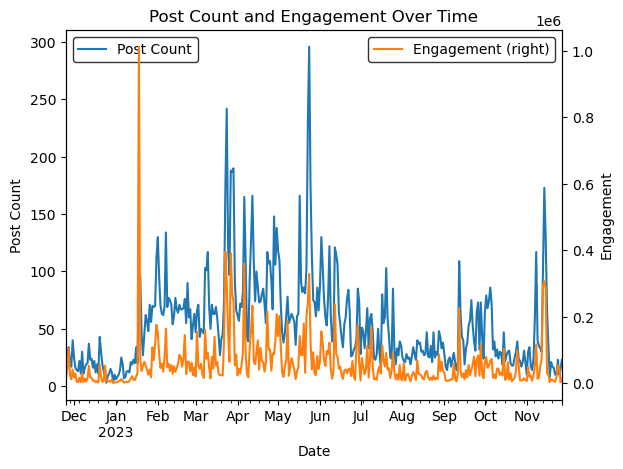

In [72]:
ax = all_by_date['Post Count'].plot()
ax2 = all_by_date['Engagement'].plot(secondary_y=True)

ax.set_ylabel("Post Count")
ax2.set_ylabel("Engagement")

leg1 = ax.legend(loc='upper left',edgecolor='black')
leg2 = ax2.legend(loc = 'upper right', edgecolor='black')

plt.title("Post Count and Engagement Over Time")
plt.savefig("all_post_time.png")

In [80]:
all_by_month = tweets.set_index(pd.to_datetime(tweets['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})

In [81]:
all_by_month = all_by_month.rename(columns={'URL':'Post Count'})

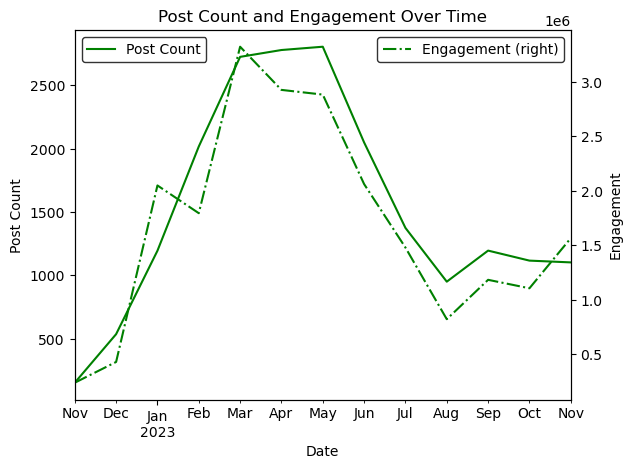

In [85]:
ax = all_by_month['Post Count'].plot(color='green')
ax2 = all_by_month['Engagement'].plot(secondary_y=True,color='green',linestyle='-.')

ax.set_ylabel("Post Count")
ax2.set_ylabel("Engagement")

leg1 = ax.legend(loc='upper left',edgecolor='black')
leg2 = ax2.legend(loc = 'upper right', edgecolor='black')

plt.title("Post Count and Engagement Over Time")
plt.savefig("all_post_month.png")